# GAMMA TELESCOPE

The data are MC generated to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere.
The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera. Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (signal) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (background).

### Dataset Description:

<pre>
The dataset consists of 19020 entries of 11 features.The description of the data features are given below.

fLength: continuous # major axis of ellipse [mm] 
fWidth: continuous # minor axis of ellipse [mm] 
fSize: continuous # 10-log of sum of content of all pixels [in #phot] 
fConc: continuous # ratio of sum of two highest pixels over fSize [ratio] 
fConc1: continuous # ratio of highest pixel over fSize [ratio] 
fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm] 
fM3Long: continuous # 3rd root of third moment along major axis [mm] 
fM3Trans: continuous # 3rd root of third moment along minor axis [mm] 
fAlpha: continuous # angle of major axis with vector to origin [deg] 
fDist: continuous # distance from origin to center of ellipse [mm] 
class: g,h # gamma (signal), hadron (background) 

Number of g = gamma (signal): 12332 
Number of h = hadron (background): 6688 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import auc

In [3]:
df=pd.read_csv(r'gamma.csv')

In [4]:
print(df.head())
print(df.columns)
print(df.shape)

    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g  
Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist', 'class'],
      dtype='object')
(19020, 11)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
fLength     19020 non-null float64
fWidth      19020 non-null float64
fSize       19020 non-null float64
fConc       19020 non-null float64
fConc1      19020 non-null float64
fAsym       19020 non-null float64
fM3Long     19020 non-null float64
fM3Trans    19020 non-null float64
fAlpha      19020 non-null float64
fDist       19020 non-null float64
class       19020 non-null object
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [6]:
df.isnull().values.any()

False

#### There existe no null value in any of the features, therefore, we do not have to deal with or handle any null values.

In [7]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


### Exploratory Data Analysis

In [8]:
df.shape

(19020, 11)

In [9]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


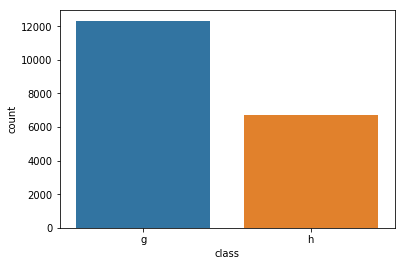

In [10]:
sns.countplot("class" , data=df)

In [11]:
df['class'].replace(['g', 'h'], [1, 0], inplace=True)

In [12]:
class_g=df[df['class']==1]
class_h=df[df['class']==0]
print("Shape of class_g",class_g.shape)
print("Shape of class_h",class_h.shape)
df['class'].value_counts()

Shape of class_g (12332, 11)
Shape of class_h (6688, 11)


1    12332
0     6688
Name: class, dtype: int64

In [13]:
print("%age of class g data : ",(12332/19020)*100)
print("%age of class h data : ",(6688/19020)*100)

%age of class g data :  64.83701366982125
%age of class h data :  35.16298633017876


#### From the above code we can conclude that the no. of pulses belonging to gamma class is 50%(approx.) more than the no. of pulses belonging to the hadron class.

(array([ 407., 1653., 3277., 4971., 4537., 2469., 1155.,  466.,   78.,
           7.]),
 array([  1.2826 ,  50.71044, 100.13828, 149.56612, 198.99396, 248.4218 ,
        297.84964, 347.27748, 396.70532, 446.13316, 495.561  ]),
 <a list of 10 Patch objects>)

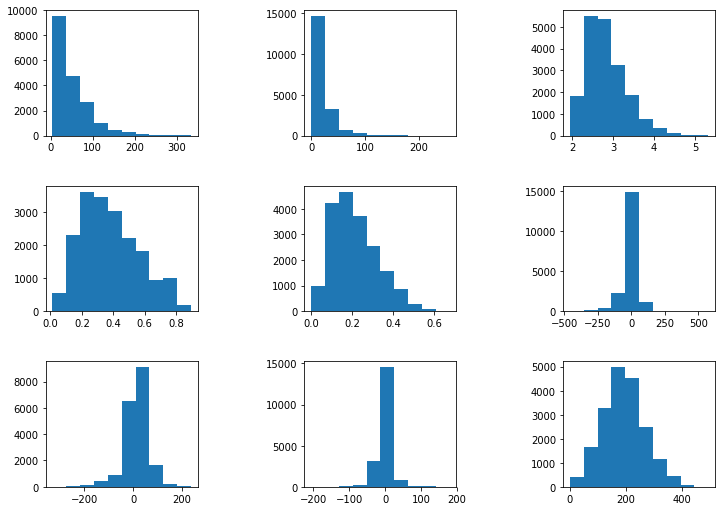

In [14]:
plt.figure(1,figsize=(12,12))
plt.subplots_adjust(hspace=0.4,wspace=0.7)
plt.subplot(431)
plt.hist(x = 'fLength', data = df)
plt.subplot(432)
plt.hist(x = 'fWidth', data = df)
plt.subplot(433)
plt.hist(x = 'fSize', data = df)
plt.subplot(434)
plt.hist(x = 'fConc', data = df)
plt.subplot(435)
plt.hist(x = 'fConc1', data = df)
plt.subplot(436)
plt.hist(x = 'fAsym', data = df)
plt.subplot(437)
plt.hist(x = 'fM3Long', data = df)
plt.subplot(438)
plt.hist(x = 'fM3Trans', data = df)
plt.subplot(439)
plt.hist(x = 'fDist', data = df)

#### The above plots shows that the data in fLength, fWidth, fSize, fConc and fConc1 is skewed left.

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


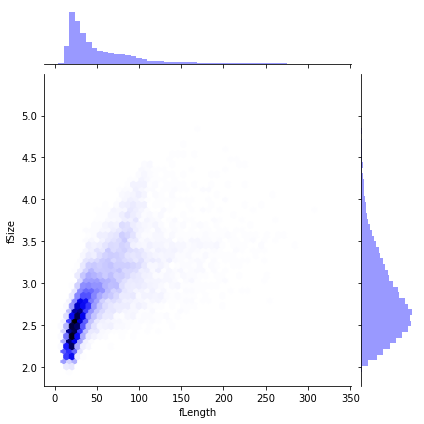

In [15]:
sns.jointplot(x = df['fLength'], y =df['fSize'], kind='hex',  color='B')

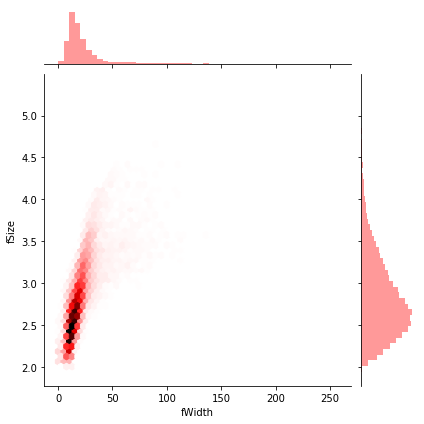

In [16]:
sns.jointplot(x = df['fWidth'], y =df['fSize'], kind='hex',  color='R')

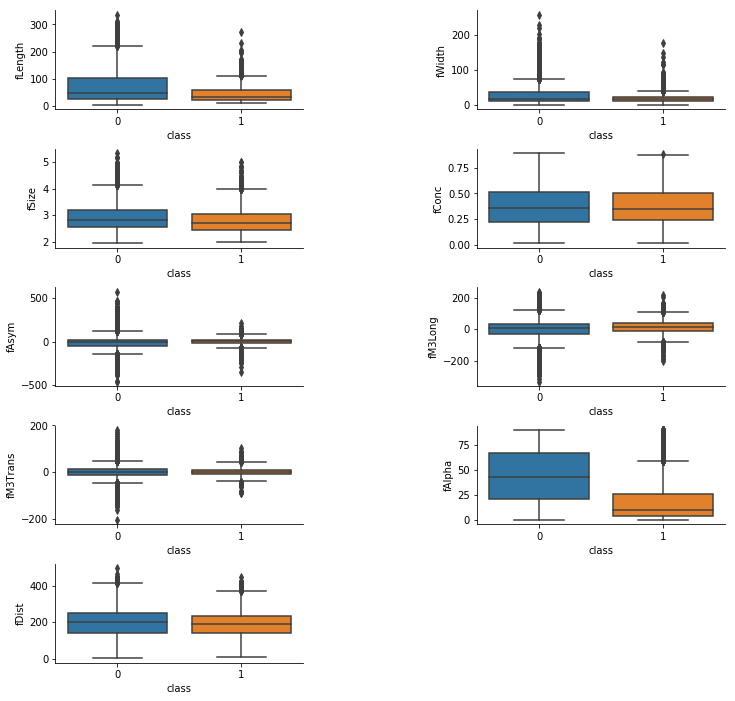

In [17]:
plt.figure(1,figsize=(12,12))
plt.subplots_adjust(hspace=0.4,wspace=0.7)
plt.subplot(521)
sns.boxplot(x ='class',y ='fLength',data=df)
sns.despine()
plt.subplot(522)
sns.boxplot(x ='class',y ='fWidth',data=df)
sns.despine()
plt.subplot(523)
sns.boxplot(x ='class',y ='fSize',data=df)
sns.despine()
plt.subplot(524)
sns.boxplot(x ='class',y ='fConc',data=df)
sns.despine()
plt.subplot(525)
sns.boxplot(x ='class',y ='fAsym',data=df)
sns.despine()
plt.subplot(526)
sns.boxplot(x ='class',y ='fM3Long',data=df)
sns.despine()
plt.subplot(527)
sns.boxplot(x ='class',y ='fM3Trans',data=df)
sns.despine()
plt.subplot(528)
sns.boxplot(x ='class',y ='fAlpha',data=df)
sns.despine()
plt.subplot(529)
sns.boxplot(x ='class',y ='fDist',data=df)
sns.despine()

In [18]:
df.corr()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
fLength,1.000000,0.770512,0.702454,-0.630999,-0.598145,-0.368556,-0.119747,0.013389,-0.008777,0.418466,-0.307572
fWidth,0.770512,1.000000,0.717517,-0.609779,-0.581141,-0.266961,-0.176234,0.039744,0.066061,0.336816,-0.265596
fSize,0.702454,0.717517,1.000000,-0.850850,-0.808835,-0.159863,0.095157,0.015455,-0.186675,0.437041,-0.117795
fConc,-0.630999,-0.609779,-0.850850,1.000000,0.976412,0.112272,-0.121899,-0.011294,0.235272,-0.328332,0.024615
fConc1,-0.598145,-0.581141,-0.808835,0.976412,1.000000,0.100159,-0.118769,-0.010966,0.229799,-0.304625,0.004797
fAsym,-0.368556,-0.266961,-0.159863,0.112272,0.100159,1.000000,0.274045,0.002553,-0.055689,-0.206730,0.173587
fM3Long,-0.119747,-0.176234,0.095157,-0.121899,-0.118769,0.274045,1.000000,-0.017197,-0.186275,0.037025,0.193409
fM3Trans,0.013389,0.039744,0.015455,-0.011294,-0.010966,0.002553,-0.017197,1.000000,0.004659,0.011427,-0.003837
fAlpha,-0.008777,0.066061,-0.186675,0.235272,0.229799,-0.055689,-0.186275,0.004659,1.000000,-0.220556,-0.460979
fDist,0.418466,0.336816,0.437041,-0.328332,-0.304625,-0.206730,0.037025,0.011427,-0.220556,1.000000,-0.065203


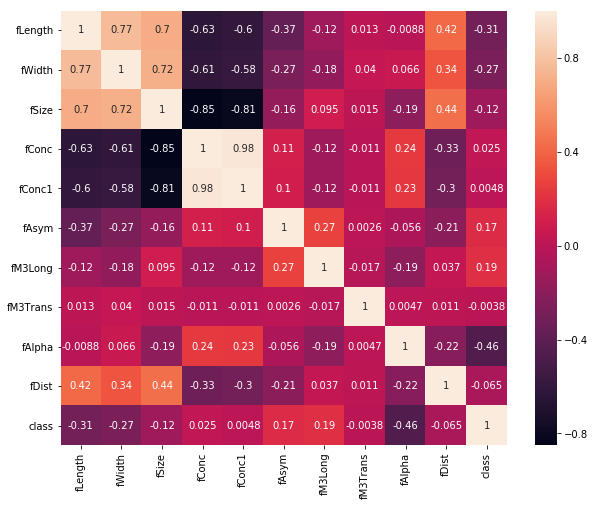

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

#### The above graph shows that fConc1 is dependent on fConc as it has a high positive value of correlation. So fConc1 can be removed.

In [20]:
df=df.drop(columns='fConc1')
df.head()

,fLength,fWidth,fSize,fConc,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,-5.5277,28.5525,21.8393,4.6480,356.4620,1


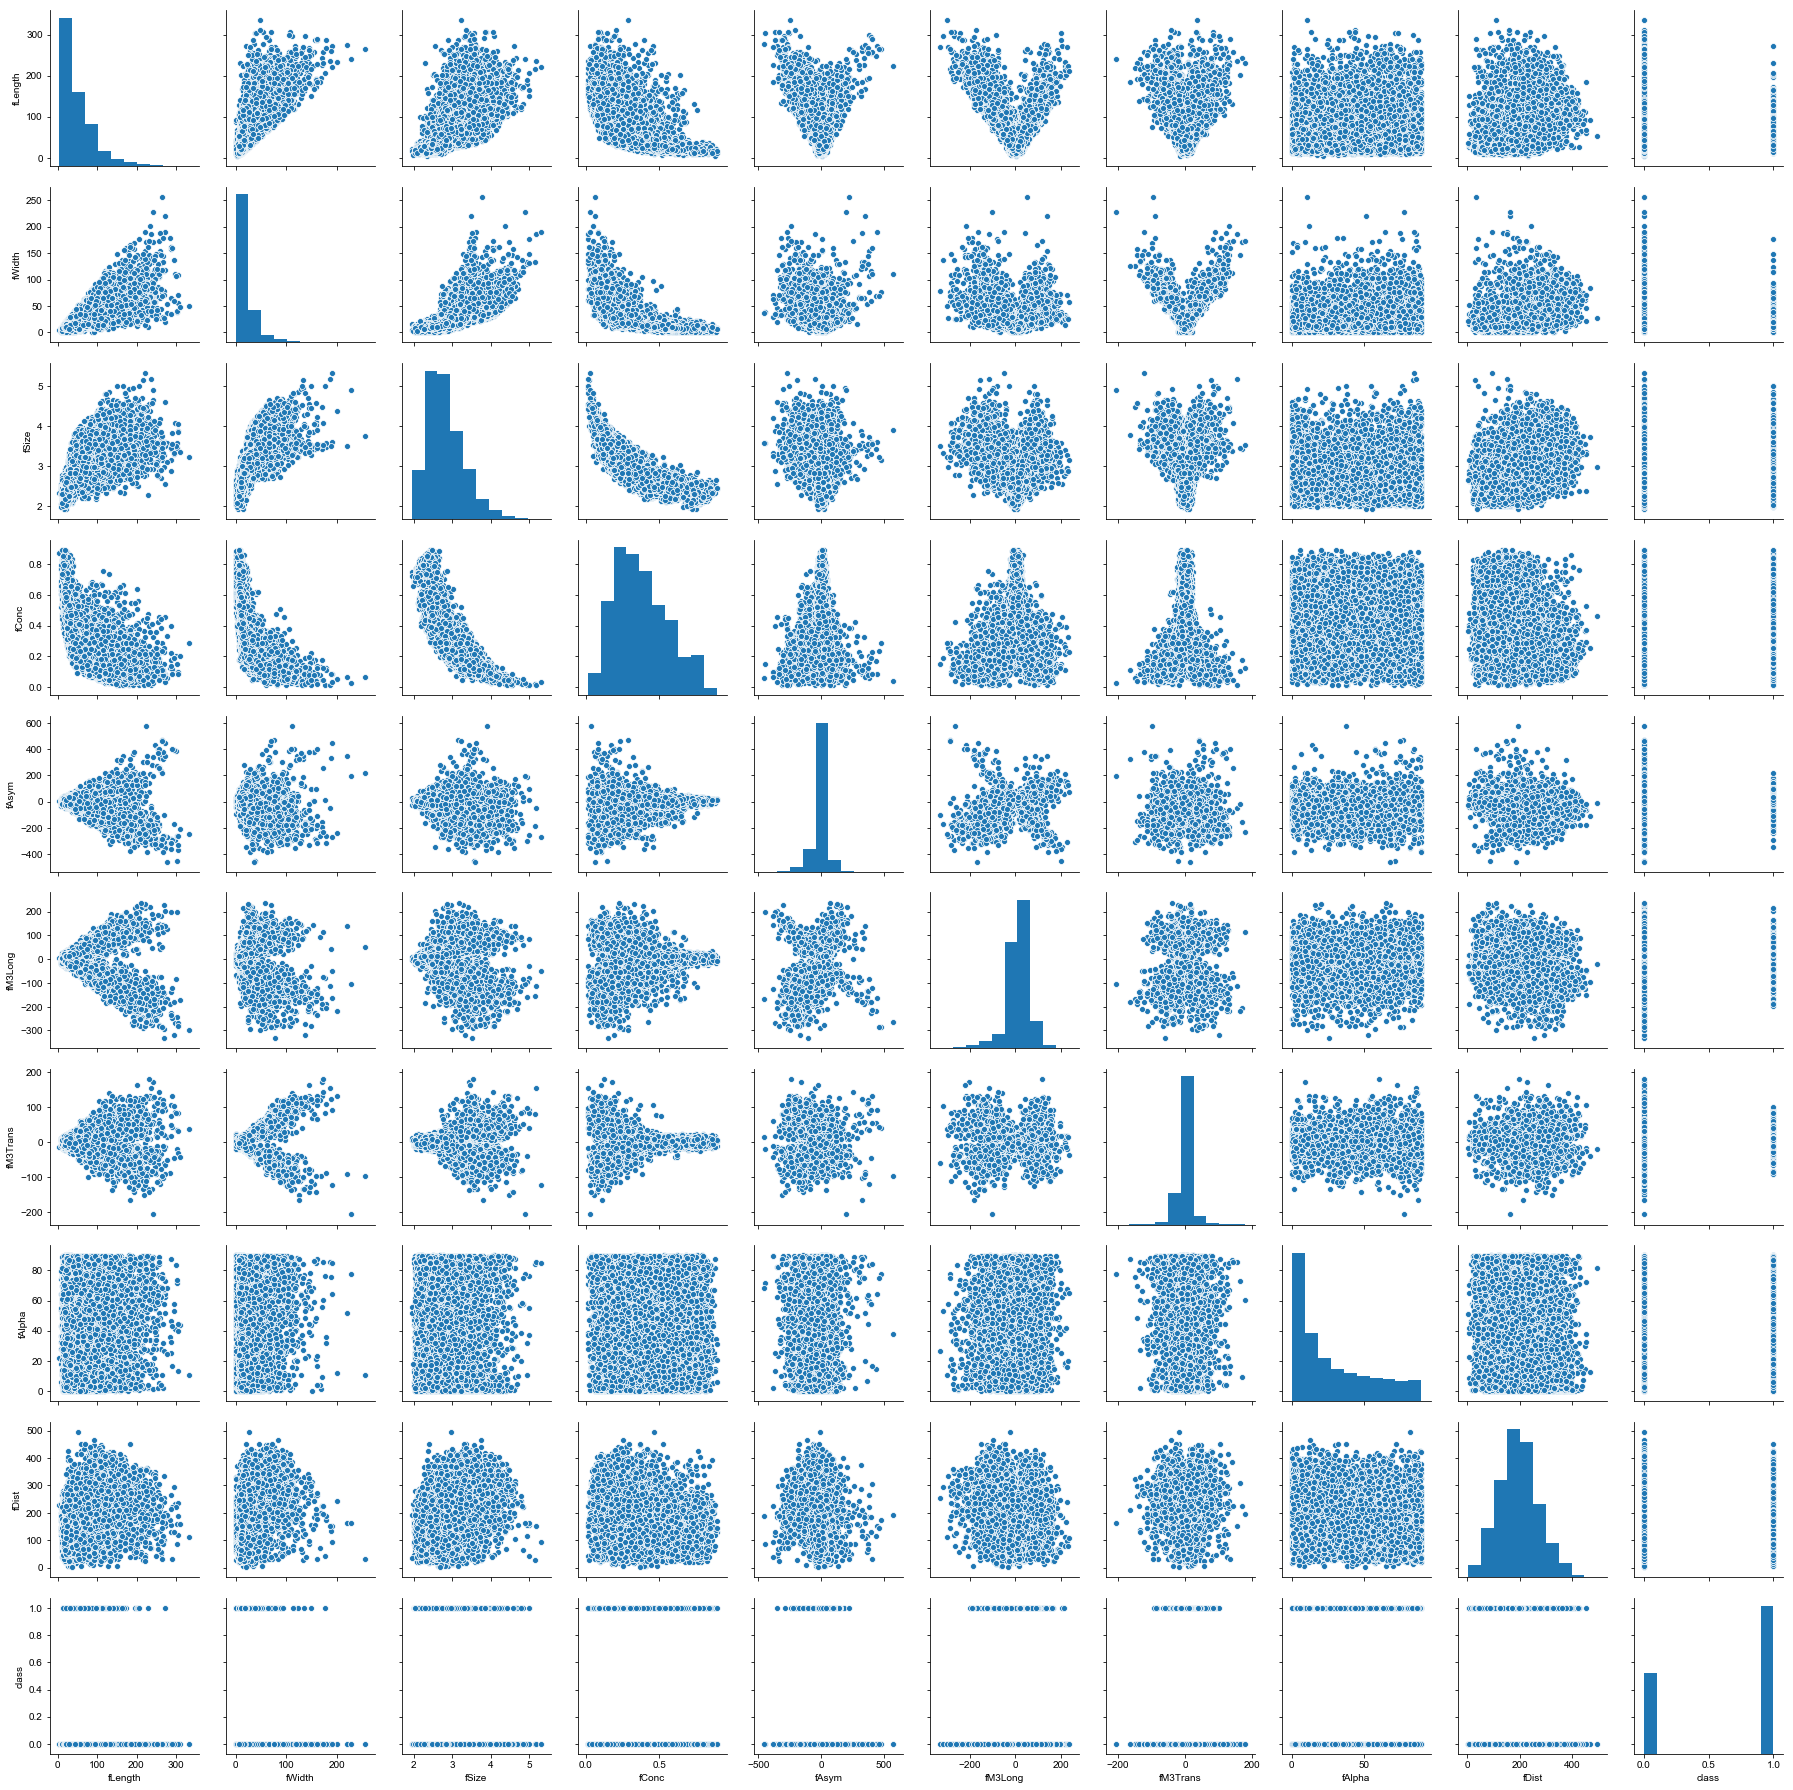

In [22]:
sns.pairplot(df) 
sns.set(rc={'figure.figsize':(10,8)})

### DATA PREPRATION

In [23]:
y=df['class']
x=df.drop(columns='class')

In [24]:
from sklearn import preprocessing

In [25]:
z = preprocessing.normalize(x)
z

array([[ 0.2780803 ,  0.15452704,  0.02554093, ..., -0.07921079,
         0.38715532,  0.79071539],
       [ 0.14952616,  0.05546741,  0.01191578, ..., -0.04711146,
         0.03009534,  0.9711517 ],
       [ 0.43858075,  0.368157  ,  0.01099131, ..., -0.12237348,
         0.20828607,  0.69497614],
       ...,
       [ 0.27269427,  0.17179679,  0.01246372, ..., -0.03421514,
         0.10951325,  0.92716739],
       [ 0.26475086,  0.16894222,  0.00877402, ..., -0.1402449 ,
         0.18604606,  0.89701296],
       [ 0.45113086,  0.12774008,  0.00773482, ...,  0.07585994,
         0.12708838,  0.65631939]])

In [26]:
z1 = preprocessing.scale(z)
z1

array([[ 0.43719913,  0.96105398,  1.96582255, ..., -1.00237102,
         1.40809271, -0.63399649],
       [-0.70084759, -0.79102102, -0.44682946, ..., -0.60036203,
        -0.7352692 ,  0.68589843],
       [ 1.8580558 ,  4.73954303, -0.61052866, ..., -1.5429366 ,
         0.33437527, -1.33433086],
       ...,
       [ 0.38951838,  1.2665054 , -0.34980424, ..., -0.4388497 ,
        -0.25853885,  0.36415237],
       [ 0.31919803,  1.21601626, -1.00315133, ..., -1.7667566 ,
         0.20087279,  0.14357216],
       [ 1.96915767,  0.487271  , -1.18716708, ...,  0.93972044,
        -0.15303874, -1.61710574]])

In [27]:
z1.shape

(19020, 9)

In [29]:
z1

array([[ 0.43719913,  0.96105398,  1.96582255, ..., -1.00237102,
         1.40809271, -0.63399649],
       [-0.70084759, -0.79102102, -0.44682946, ..., -0.60036203,
        -0.7352692 ,  0.68589843],
       [ 1.8580558 ,  4.73954303, -0.61052866, ..., -1.5429366 ,
         0.33437527, -1.33433086],
       ...,
       [ 0.38951838,  1.2665054 , -0.34980424, ..., -0.4388497 ,
        -0.25853885,  0.36415237],
       [ 0.31919803,  1.21601626, -1.00315133, ..., -1.7667566 ,
         0.20087279,  0.14357216],
       [ 1.96915767,  0.487271  , -1.18716708, ...,  0.93972044,
        -0.15303874, -1.61710574]])

#### Variance Threshold : Feature selector that removes all low-variance features.

#### This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

In [30]:
from sklearn.feature_selection import VarianceThreshold

In [31]:
vth=z1
selector = VarianceThreshold()
selector.fit_transform(vth)

array([[ 0.43719913,  0.96105398,  1.96582255, ..., -1.00237102,
         1.40809271, -0.63399649],
       [-0.70084759, -0.79102102, -0.44682946, ..., -0.60036203,
        -0.7352692 ,  0.68589843],
       [ 1.8580558 ,  4.73954303, -0.61052866, ..., -1.5429366 ,
         0.33437527, -1.33433086],
       ...,
       [ 0.38951838,  1.2665054 , -0.34980424, ..., -0.4388497 ,
        -0.25853885,  0.36415237],
       [ 0.31919803,  1.21601626, -1.00315133, ..., -1.7667566 ,
         0.20087279,  0.14357216],
       [ 1.96915767,  0.487271  , -1.18716708, ...,  0.93972044,
        -0.15303874, -1.61710574]])

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

## DATA MODELING

### IMPLEMENTING CLASSIFIER MODELS AND ALSO COMPARING DIFFERENT CLASSIFIERS USING AUC MEASURE

### 1) Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
lrascore=metrics.accuracy_score(lr_pred,y_test)
lrascore

0.7886435331230284

In [36]:
lr_auc=metrics.roc_auc_score(lr_pred,y_test)
lr_auc

0.7798516842634489

### 2) Naive Bayes(Gaussian NB)

In [37]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
gnb_pred=gnb.predict(X_test)

In [39]:
gnb_ascore=metrics.accuracy_score(gnb_pred,y_test)
gnb_ascore

0.7226077812828602

In [40]:
gnb_auc=metrics.roc_auc_score(gnb_pred,y_test)
gnb_auc

0.7159312263727985

### 3) SVM

In [41]:
from sklearn.svm import SVC

In [42]:
svm_model=SVC()
svm_model.fit(X_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [43]:
svm_pred=svm_model.predict(X_test)

In [44]:
svm_ascore=metrics.accuracy_score(svm_pred,y_test)
svm_ascore

0.656782334384858

In [45]:
svm_auc=metrics.roc_auc_score(svm_pred,y_test)
svm_auc

0.81595141588263

### 4) Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dt=DecisionTreeClassifier(criterion='gini')
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [48]:
dt_pred=dt.predict(X_test)

In [49]:
dt_ascore=metrics.accuracy_score(dt_pred,y_test)
dt_ascore

0.807570977917981

In [50]:
dt_auc=metrics.roc_auc_score(dt_pred,y_test)
dt_auc

0.7891892582664615

### 5) Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf_clf=RandomForestClassifier(criterion='gini')
rf_clf.fit(X_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:
rf_pred=rf_clf.predict(X_test)

In [54]:
rf_ascore=metrics.accuracy_score(rf_pred,y_test)
rf_ascore

0.8704521556256573

In [56]:
rf_auc=metrics.roc_auc_score(rf_pred,y_test)
rf_auc

0.8608750524788865

### 6) Gradient Boosting

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
gb=GradientBoostingClassifier(n_estimators=30,random_state=7,verbose=1)
gb.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.2241            3.02s
         2           1.1670            1.86s
         3           1.1192            1.45s
         4           1.0799            1.23s
         5           1.0454            1.09s
         6           1.0156            0.97s
         7           0.9892            0.89s
         8           0.9658            0.82s
         9           0.9442            0.76s
        10           0.9252            0.70s
        20           0.8066            0.30s
        30           0.7410            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=30,
              n_iter_no_change=None, presort='auto', random_state=7,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=1, warm_start=False)

In [59]:
gb_pred=gb.predict(X_test)

In [60]:
gb_ascore=metrics.accuracy_score(gb_pred,y_test)
gb_ascore

0.8502628811777077

In [61]:
gb_auc=metrics.roc_auc_score(gb_pred,y_test)
gb_auc

0.8627047675859221

### 7) Bagging

In [62]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bagging_clf=BaggingClassifier(n_estimators=30,random_state=7,verbose=1)
bagging_clf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
bagging_pred=bagging_clf.predict(X_test)

In [153]:
bagging_ascore=metrics.accuracy_score(bagging_pred,y_test)
bagging_ascore

0.880546792849632

In [156]:
bagging_auc=metrics.roc_auc_score(bagging_pred,y_test)
bagging_auc

0.8780411453792994

## ACCURACY AND AUC MEASURE

<table border='1 px'>
    <tr>
        <th>Classifiaction Model</th>
        <th>Accuracy Score</th>
        <th>AUC Measure</th>
    </tr>
    <tr>
        <td>Logistic Regression</td>
        <td>0.7886435331230284</td>
        <td>0.7798516842634489</td>
    </tr>
    <tr>
        <td>Naive Bayes</td>
        <td>0.7226077812828602</td>
        <td>0.7159312263727985</td>
    </tr>
    <tr>
        <td>SVM</td>
        <td>0.656782334384858</td>
        <td>0.81595141588263</td>
    </tr>
    <tr>
        <td>Decision Tree</td>
        <td>0.8086225026288117</td>
        <td>0.7901765475522275</td>
    </tr>
    <tr>
        <td>Random Forest</td>
        <td>0.8683491062039957</td>
        <td>0.8581939274244289</td>
    </tr>
    <tr>
        <td>Gradient Boosting</td>
        <td>0.8502628811777077</td>
        <td>0.8627047675859221</td>
    </tr>
    <tr>
        <td>Bagging</td>
        <td>0.880546792849632</td>
        <td>0.8780411453792994</td>
    </tr>
</table>

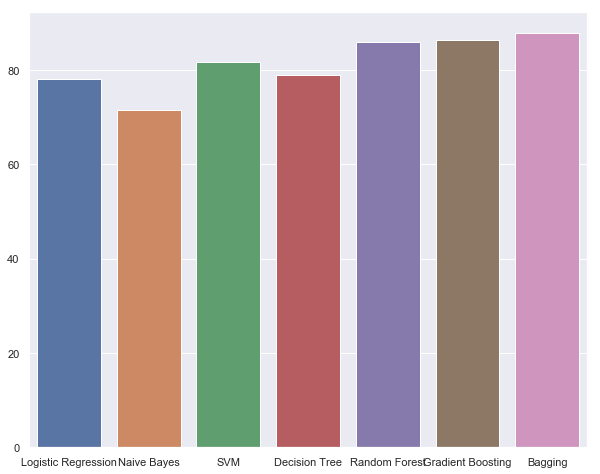

In [158]:
x_axis=['Logistic Regression','Naive Bayes','SVM','Decision Tree','Random Forest','Gradient Boosting','Bagging']
y_axis=[77.98,71.59,81.59,79.01,85.81,86.270,87.80]
sns.barplot(x=x_axis,y=y_axis)

### From the above results we can conclude that the Bagging classifiaction method provides the best results giving the highest accuracy score of 88% and AUC score of 87.8%.